In [15]:

import pandas as pd
df = pd.read_csv("netflix_titles.csv", encoding='latin1')
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [16]:

print("Shape of dataset:", df.shape)
print("\nColumn names:\n", df.columns)
print("\nDataset Info:")
df.info()
print("\nMissing values in each column:")
print(df.isnull().sum())


Shape of dataset: (8807, 12)

Column names:
 Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

Missing values 

In [17]:

df = df.drop_duplicates()
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

df['duration_num'] = df['duration'].str.extract(r'(\d+)') 
df['duration_num'] = pd.to_numeric(df['duration_num'], errors='coerce')
df[['title', 'duration', 'duration_num', 'date_added', 'year_added', 'month_added']].head()


,title,duration,duration_num,date_added,year_added,month_added
0,Dick Johnson Is Dead,90 min,90.0,2021-09-25,2021.0,9.0
1,Blood & Water,2 Seasons,2.0,2021-09-24,2021.0,9.0
2,Ganglands,1 Season,1.0,2021-09-24,2021.0,9.0
3,Jailbirds New Orleans,1 Season,1.0,2021-09-24,2021.0,9.0
4,Kota Factory,2 Seasons,2.0,2021-09-24,2021.0,9.0


In [18]:
print("🔹 Count of Movies vs TV Shows\n")
print(df['type'].value_counts().to_string())
print("\n" + "-"*50)

print("🔹 Top 10 Countries with Most Content\n")
print(df['country'].value_counts().head(10).to_string())
print("\n" + "-"*50)

print("🔹 Content Releases by Year (Top 10 Most Recent Years)\n")
print(df['release_year'].value_counts().sort_index(ascending=False).head(10).to_string())
print("\n" + "-"*50)

print("🔹 Top 10 Most Common Ratings\n")
print(df['rating'].value_counts().head(10).to_string())
print("\n" + "-"*50)

df['main_genre'] = df['listed_in'].str.split(',').str[0]
print("🔹 Top 10 Most Common Genres\n")
print(df['main_genre'].value_counts().head(10).to_string())
print("\n" + "-"*50)

print("🔹 Number of Indian TV Shows Released After 2017:")
print(df[(df['country'] == 'India') & (df['type'] == 'TV Show') & (df['release_year'] > 2017)].shape[0])




🔹 Count of Movies vs TV Shows

type
Movie      6131
TV Show    2676

--------------------------------------------------
🔹 Top 10 Countries with Most Content

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106

--------------------------------------------------
🔹 Content Releases by Year (Top 10 Most Recent Years)

release_year
2021     592
2020     953
2019    1030
2018    1147
2017    1032
2016     902
2015     560
2014     352
2013     288
2012     237

--------------------------------------------------
🔹 Top 10 Most Common Ratings

rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80

--------------------------------------------------
🔹 Top 10 Most Common Genres

main_genre
Dramas                      1600


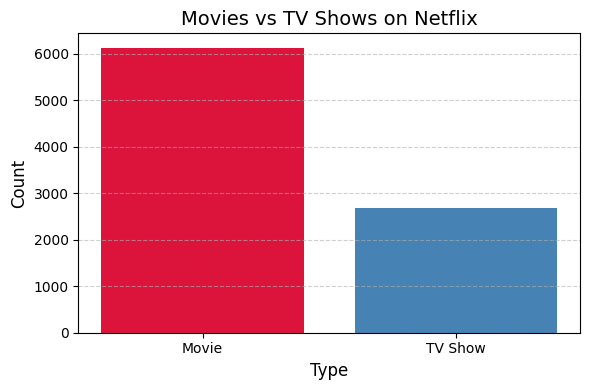

In [19]:
import matplotlib.pyplot as plt
type_counts = df['type'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(type_counts.index, type_counts.values, color=['crimson', 'steelblue'])
plt.title("Movies vs TV Shows on Netflix", fontsize=14)
plt.xlabel("Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


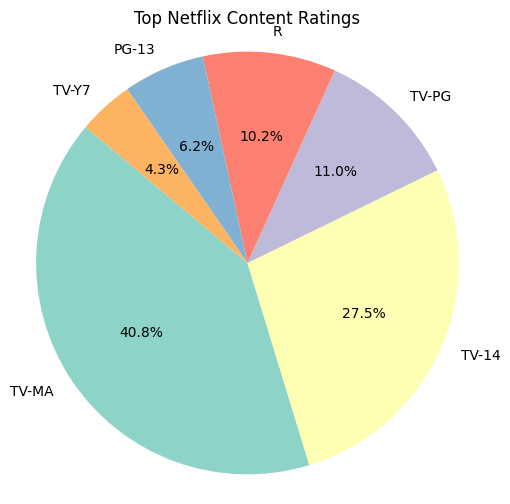

In [20]:
rating_counts = df['rating'].value_counts().head(6)  

plt.figure(figsize=(6, 6))
plt.pie(rating_counts.values, labels=rating_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title("Top Netflix Content Ratings")
plt.axis('equal') 
plt.show()


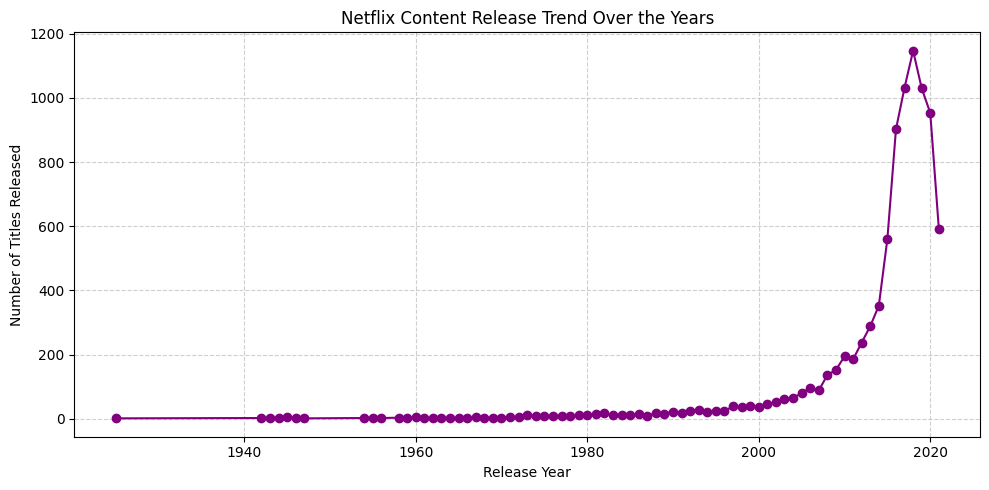

In [21]:
content_by_year = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.plot(content_by_year.index, content_by_year.values, color='purple', marker='o')
plt.title("Netflix Content Release Trend Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles Released")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Netflix had rapid content growth between 2015–2019, with a peak in 2020 year. The content count dropped in 2020, likely due to the pandemic."


## 📌 Project Summary: Netflix Data Analysis  
**Subject:** Python for Computing  
**Name:** D. Arjun  
**Roll Number:** 24B81A67L3  

---

This project involved exploring the Netflix Movies and TV Shows dataset using Python, Pandas, and Matplotlib.

### 🎯 Objectives:
- Understand trends in Netflix content over the years
- Analyze types, ratings, countries, and genres
- Visualize data for clear interpretation

---

### 🔍 Key Observations:

- 🔸 Netflix has more **Movies** than TV Shows
- 🔸 **United States**, **India**, and **United Kingdom** are the top content-producing countries
- 🔸 The most common rating is **TV-MA**, followed by **TV-14** and **TV-PG**
- 🔸 Genres like **Dramas**, **Comedies**, and **Documentaries** are most popular
- 🔸 There was a rise in content between **2016 and 2019**, followed by a slight drop (possibly due to the pandemic)
- 🔸 Over **[fill number]** Indian TV shows were added after 2017

---

### 📈 Visualizations Created:
- Movies vs TV Shows (Bar chart)
- Rating Distribution (Pie chart)
- Content Trend Over Years (Line chart)

---

### ✅ Skills Gained:
- Data cleaning using Pandas
- Extracting insights using group, filter, and value counts
- Visualizing trends using Matplotlib
- Working with real-world datasets in a structured project

---

### 🏁 Conclusion:
This project helped me understand how to handle real-world data, clean it, extract useful insights, and visualize trends in a clear, simple, and effective way using Python.




